In [3]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

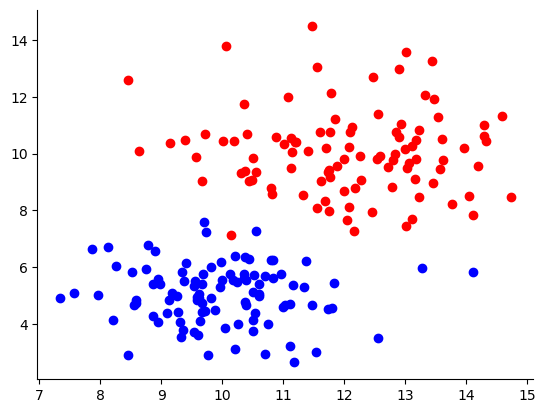

In [4]:
N =100
np.random.seed(2)
X1 = np.random.multivariate_normal([10, 5], [[1, 0],[0, 1]], 100)
X2 = np.random.multivariate_normal([12, 10], [[2, 0],[0, 2]], 100)
plt.scatter(X1[:,0],X1[:,1],c='b')
plt.scatter(X2[:,0],X2[:,1],c='r')
sns.despine()

In [5]:
X = np.append(X1,X2,axis=0)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(X)

C:\Users\Jayson Cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jayson Cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=2)

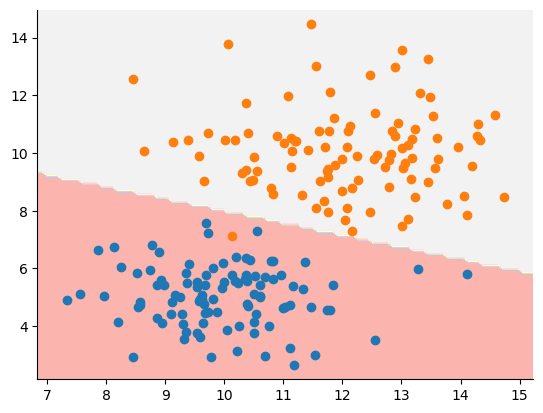

In [6]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
sns.despine()

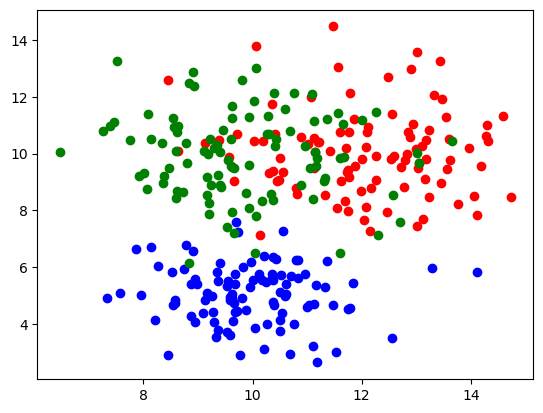

In [7]:
X3 = np.random.multivariate_normal([10, 10], [[2, 0],[0, 2]], 100)
plt.scatter(X1[:,0],X1[:,1],c='b')
plt.scatter(X2[:,0],X2[:,1],c='r')
plt.scatter(X3[:,0],X3[:,1],c='g')



C:\Users\Jayson Cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Jayson Cortez\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


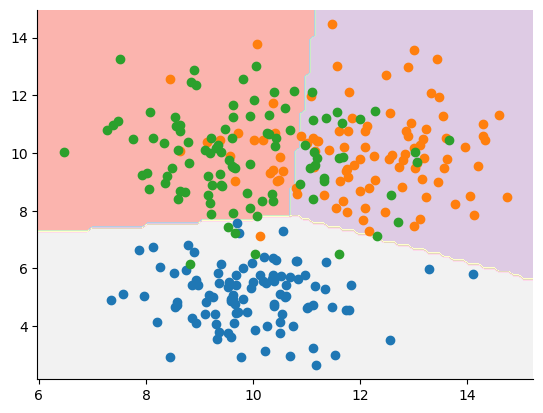

In [8]:
args = (X1, X2, X3)
X = np.concatenate(args,axis=0)
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
f = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X1[:,0],X1[:,1])
plt.scatter(X2[:,0],X2[:,1])
plt.scatter(X3[:,0],X3[:,1])

sns.despine()

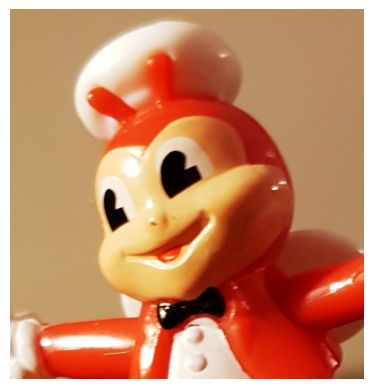

In [3]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
A=imread("jolibee_head.jpg");
img = plt.imshow(A)
plt.axis('off')
plt.show()

In [5]:
s = np.shape(A)
k=10
length = s[0]*s[1]
X = np.zeros([length,3])

count=0
for i in range(s[0]):
    for j in range(s[1]):
        X[count,:] = A[i,j,:]
        count+=1

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k, init='k-means++')
kmeans.fit(X)

C:\Users\Jayson Cortez\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=10)

In [6]:
Z=kmeans.predict(X)

In [7]:
c = np.zeros([k,3])
for i in range(k):
    c[i,:] = np.mean(X[np.where(Z==i)],axis=0)


In [8]:
A_new = np.zeros_like(A)
count = 0
for i in range(s[0]):
    for j in range(s[1]):
        A_new[i,j,:] = c[Z[count]]
        count+=1

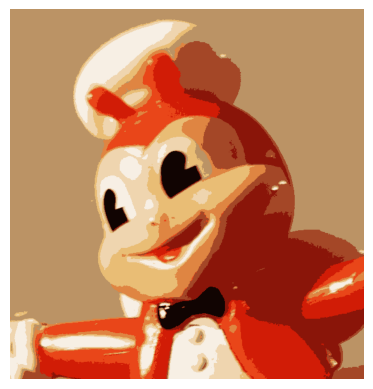

In [9]:
img = plt.imshow(A_new)
plt.axis('off')
plt.show()